## Primero se identifica que tipo de variable tienes, categorica o numerica.

Categorica: tienen un numero de valores determinado.<br />
ejemplo: tipo de proyecto, fases del proyecto

numerica: usualmente variables de cantidades.<br />
ejemplo: numero de dias, monto gastado ($)

Se puede transofrmar una variable numerica en una categorica delimitando rangos.<br />
ejemplo: variable numerica monto gastado en $, se transforma en categorica si en vez se utilizan los rangos >100, 101 - 200, >200. En este caso se tendrian solo tres posibles valores.



In [ ]:
# load packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [97]:
# create data (mu: expected days in phaase, sigma:std deviation)
mu = [17,25,20,15]
sigma = [1,4,2,1]

phase_list = []
for i in range(len(mu)):
    phase = np.random.normal(mu[i], sigma[1], 10)
    phase_list.append(phase)


data = pd.DataFrame(phase_list).transpose()
data= data.round(0)
data.columns = ['phase_1','phase_2','phase_3','phase_4']
data = data.stack().reset_index()
data.columns = ['proyect_id','phase','days']
data['cost'] = np.random.normal(500, 50, data.shape[0])
data['proyect_id'] = 'proyect_' + data['proyect_id'].astype(str)

print(data.head())
print(data.shape)

  proyect_id    phase  days        cost
0  proyect_0  phase_1  17.0  464.371611
1  proyect_0  phase_2  25.0  480.647307
2  proyect_0  phase_3  22.0  473.297414
3  proyect_0  phase_4  19.0  498.589152
4  proyect_1  phase_1  16.0  464.657322
(40, 4)


### ejemplo para una variable categorica con una variable numerica

si quieres ver un solo proyecto cuantos dias se ha tomado en cada fase <br />
variables:
- categorica: fase (eje x)
- numerica: dias (eje y)


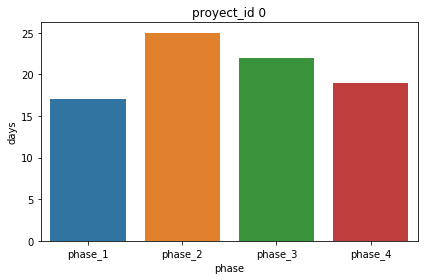

In [98]:
sns.barplot(x='phase',y='days',data=data[data.proyect_id == 'proyect_0'])
plt.title('proyect_id 0')
plt.tight_layout()
plt.show()

## ejemplo con dos variables categoricas y una numerica

quieres ver todos los proyectos al mismo tiempo cuantos dias se han tomado en cada fase <br />
variables:
- categorica: proyecto (cada color es un proyecto)
- categorica: fase (eje x)
- numerica: dias (eje y, la altura del punto en cada fase representa los dias en esa fase)



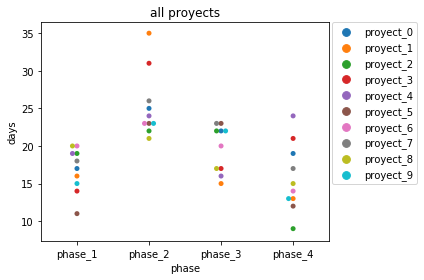

In [99]:
sns.swarmplot(x='phase',y='days',hue='proyect_id',data=data)
plt.title('all proyects')
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.tight_layout()
plt.show()

## ejemplo con dos variables numericas y una categorica

Si quieres ver el costo total de cada proyecto y el numero de dias que tardo en total <br />
variables:
- numerica: costo total (eje y)
- numerica: dias totales (eje x)
- categorica: proyecto (color)


In [100]:
# get totals for each proyect
total_data = data.groupby('proyect_id').sum().reset_index()


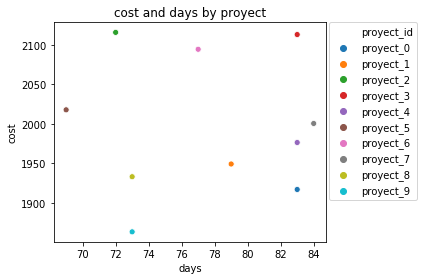

In [102]:
sns.scatterplot(x='days',y='cost',hue='proyect_id',data=total_data)
plt.title('cost and days by proyect')
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.tight_layout()
plt.show()